# **ANÁLISIS ITERATIVO DE LAS CATEGORÍAS IDEOLÓGICAS EN WIKIPEDIA**
#### Ramón Zamora, carné 10233

## INTRODUCCIÓN
El presente proyecto utiliza herramientas de análisis de texto computacional para llevar a cabo un exploración de los datos de los artículos vinculados a las categorías de distintas ideologías que se pueden encontrar en la enciclopedia digial Wikipedia. Para llevar a cabo este ejercicio se utilizarán las librerías de ...

In [1]:
import wikipediaapi
import pickle
from pprint import pprint
import pandas as pd
pd.set_option("display.notebook_repr_html", False)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dcss.text import bigram_process, preprocess, bow_to_df
from dcss.plotting import format_axes_commas, custom_seaborn
from dcss.utils import sparse_groupby
custom_seaborn()
import spacy
nlp = spacy.load('en_core_web_sm')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
import scipy
from itertools import islice

In [2]:
wiki_wiki = wikipediaapi.Wikipedia('Ciencias Sociales Computacionales (can06728@uvg.edu.gt)', 'en')

In [3]:
#1. Busqueda de Animal_rights_movement
cat_Animal_rights_movement = wiki_wiki.page("Category:Animal_rights_movement")
print("Animal_rights_movement exist: %s" % cat_Animal_rights_movement.exists())
#2. Christian_movements
cat_Christian_movements = wiki_wiki.page("Category:Christian_movements")
print("Christian_movements: %s" % cat_Christian_movements.exists())
#3. Criminal_justice_reform
cat_Criminal_justice_reform = wiki_wiki.page("Category:Criminal_justice_reform")
print("Criminal_justice_reform exist: %s" % cat_Criminal_justice_reform.exists())
#4. Disability_rights
cat_Disability_rights = wiki_wiki.page("Category:Disability_rights")
print("Disability_rights exist: %s" % cat_Disability_rights.exists())
#5. Feminist_movement
cat_Feminist_movement = wiki_wiki.page("Category:Feminist_movement")
print("Feminist_movementxist: %s" % cat_Feminist_movement.exists())
#6. Free_software_movement
cat_Free_software_movement = wiki_wiki.page("Category:Free_software_movement")
print("Free_software_movement exist: %s" % cat_Free_software_movement.exists())
#7. LGBT_rights_movement
cat_LGBT_rights_movement = wiki_wiki.page("Category:LGBT_rights_movement")
print("LGBT_rights_movement exist: %s" % cat_LGBT_rights_movement.exists())
#8. Nonviolent_resistance_movements
cat_Nonviolent_resistance_movements = wiki_wiki.page("Category:Nonviolent_resistance_movements")
print("Nonviolent_resistance_movements exist: %s" % cat_Nonviolent_resistance_movements.exists())
#9. Palestinian_solidarity_movement
cat_Palestinian_solidarity_movement = wiki_wiki.page("Category:Palestinian_solidarity_movement")
print("Palestinian_solidarity_movement: %s" % cat_Palestinian_solidarity_movement.exists())
#10. Slow _movement
cat_Slow_movement = wiki_wiki.page("Category:Slow _movement")
print("Slow _movement exist: %s" % cat_Slow_movement.exists())
#11. Jewish_movements
cat_Jewish_movements = wiki_wiki.page("Category:Jewish_movements")
print("Jewish_movements: %s" % cat_Jewish_movements.exists())
#12. Youth_movements
cat_Youth_movements = wiki_wiki.page("Category:Youth_movements")
print("Youth_movements exist: %s" % cat_Youth_movements.exists())

Animal_rights_movement exist: True
Christian_movements: True
Criminal_justice_reform exist: True
Disability_rights exist: True
Feminist_movementxist: True
Free_software_movement exist: True
LGBT_rights_movement exist: True
Nonviolent_resistance_movements exist: True
Palestinian_solidarity_movement: True
Slow _movement exist: True
Jewish_movements: True
Youth_movements exist: True


In [4]:
data = []
pages_names = cat_Animal_rights_movement.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_Animal_rights_movement,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_Christian_movements.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_Christian_movements,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_Criminal_justice_reform.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_Criminal_justice_reform,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_Disability_rights.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_Disability_rights,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_Feminist_movement.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_Feminist_movement,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_Free_software_movement.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_Free_software_movement,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_LGBT_rights_movement.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_LGBT_rights_movement,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_Nonviolent_resistance_movements.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_Nonviolent_resistance_movements,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_Palestinian_solidarity_movement.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_Palestinian_solidarity_movement,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_Slow_movement.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_Slow_movement,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_Jewish_movements.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_Jewish_movements,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_Youth_movements.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_Youth_movements,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

    df = pd.DataFrame(data)

In [5]:
df.to_csv('SocialMovements.csv')

In [6]:
columns = ['Category', 'Namespace', 'Title', 'Summary' 'Content']
wiki_df = pd.read_csv('SocialMovements.csv')
wiki_df.dropna(subset = ['Title', 'Summary'], inplace=True)
wiki_df =wiki_df.query('Namespace < 1')
wiki_df['Category'].value_counts()

Category:Nonviolent resistance movements (id: 1952176, ns: 14)     97
Category:Disability rights (id: 5119200, ns: 14)                   73
Category:Christian movements (id: 16181273, ns: 14)                67
Category:Animal rights movement (id: 7492917, ns: 14)              50
Category:Slow movement (id: 5360355, ns: 14)                       25
Category:Criminal justice reform (id: 46917429, ns: 14)            22
Category:Youth movements (id: 18949344, ns: 14)                    19
Category:Jewish movements (id: 11050806, ns: 14)                   18
Category:LGBT rights movement (id: 6371525, ns: 14)                17
Category:Palestinian solidarity movement (id: 64683662, ns: 14)    13
Category:Feminist movement (id: 6359957, ns: 14)                   10
Category:Free software movement (id: 48447672, ns: 14)              9
Name: Category, dtype: int64

In [7]:
content_keep = [
    'Category:Nonviolent resistance movements (id: 1952176, ns: 14)',
    'Category:Disability rights (id: 5119200, ns: 14)',
    'Category:Christian movements (id: 16181273, ns: 14)',
    'Category:Animal rights movement (id: 7492917, ns: 14)',
    'Category:Slow movement (id: 5360355, ns: 14)',
    'Category:Criminal justice reform (id: 46917429, ns: 14)',
    'Category:Youth movements (id: 18949344, ns: 14)',
    'Category:Jewish movements (id: 11050806, ns: 14)',
    'Category:LGBT rights movement (id: 6371525, ns: 14)',
    'Category:Palestinian solidarity movement (id: 64683662, ns: 14)',
    'CCategory:Feminist movement (id: 6359957, ns: 14)',
    'Category:Free software movement (id: 48447672, ns: 14)'
]
content_subset = wiki_df[wiki_df['Category'].isin(content_keep)].copy()
content_subset.reset_index(drop=True, inplace=True)
total_content_counts = content_subset['Category'].value_counts()
total_content_counts

Category:Nonviolent resistance movements (id: 1952176, ns: 14)     97
Category:Disability rights (id: 5119200, ns: 14)                   73
Category:Christian movements (id: 16181273, ns: 14)                67
Category:Animal rights movement (id: 7492917, ns: 14)              50
Category:Slow movement (id: 5360355, ns: 14)                       25
Category:Criminal justice reform (id: 46917429, ns: 14)            22
Category:Youth movements (id: 18949344, ns: 14)                    19
Category:Jewish movements (id: 11050806, ns: 14)                   18
Category:LGBT rights movement (id: 6371525, ns: 14)                17
Category:Palestinian solidarity movement (id: 64683662, ns: 14)    13
Category:Free software movement (id: 48447672, ns: 14)              9
Name: Category, dtype: int64

In [8]:
sampled_contents = content_subset.groupby('Category').sample(replace=False, frac=.3, random_state=23)
len(sampled_contents)

410

In [9]:
sample_contents_counts = sampled_contents['Category'].value_counts()


In [10]:
sampled_contents['content_len'] = sampled_contents['Content'].apply(lambda x: len(x.split())) 

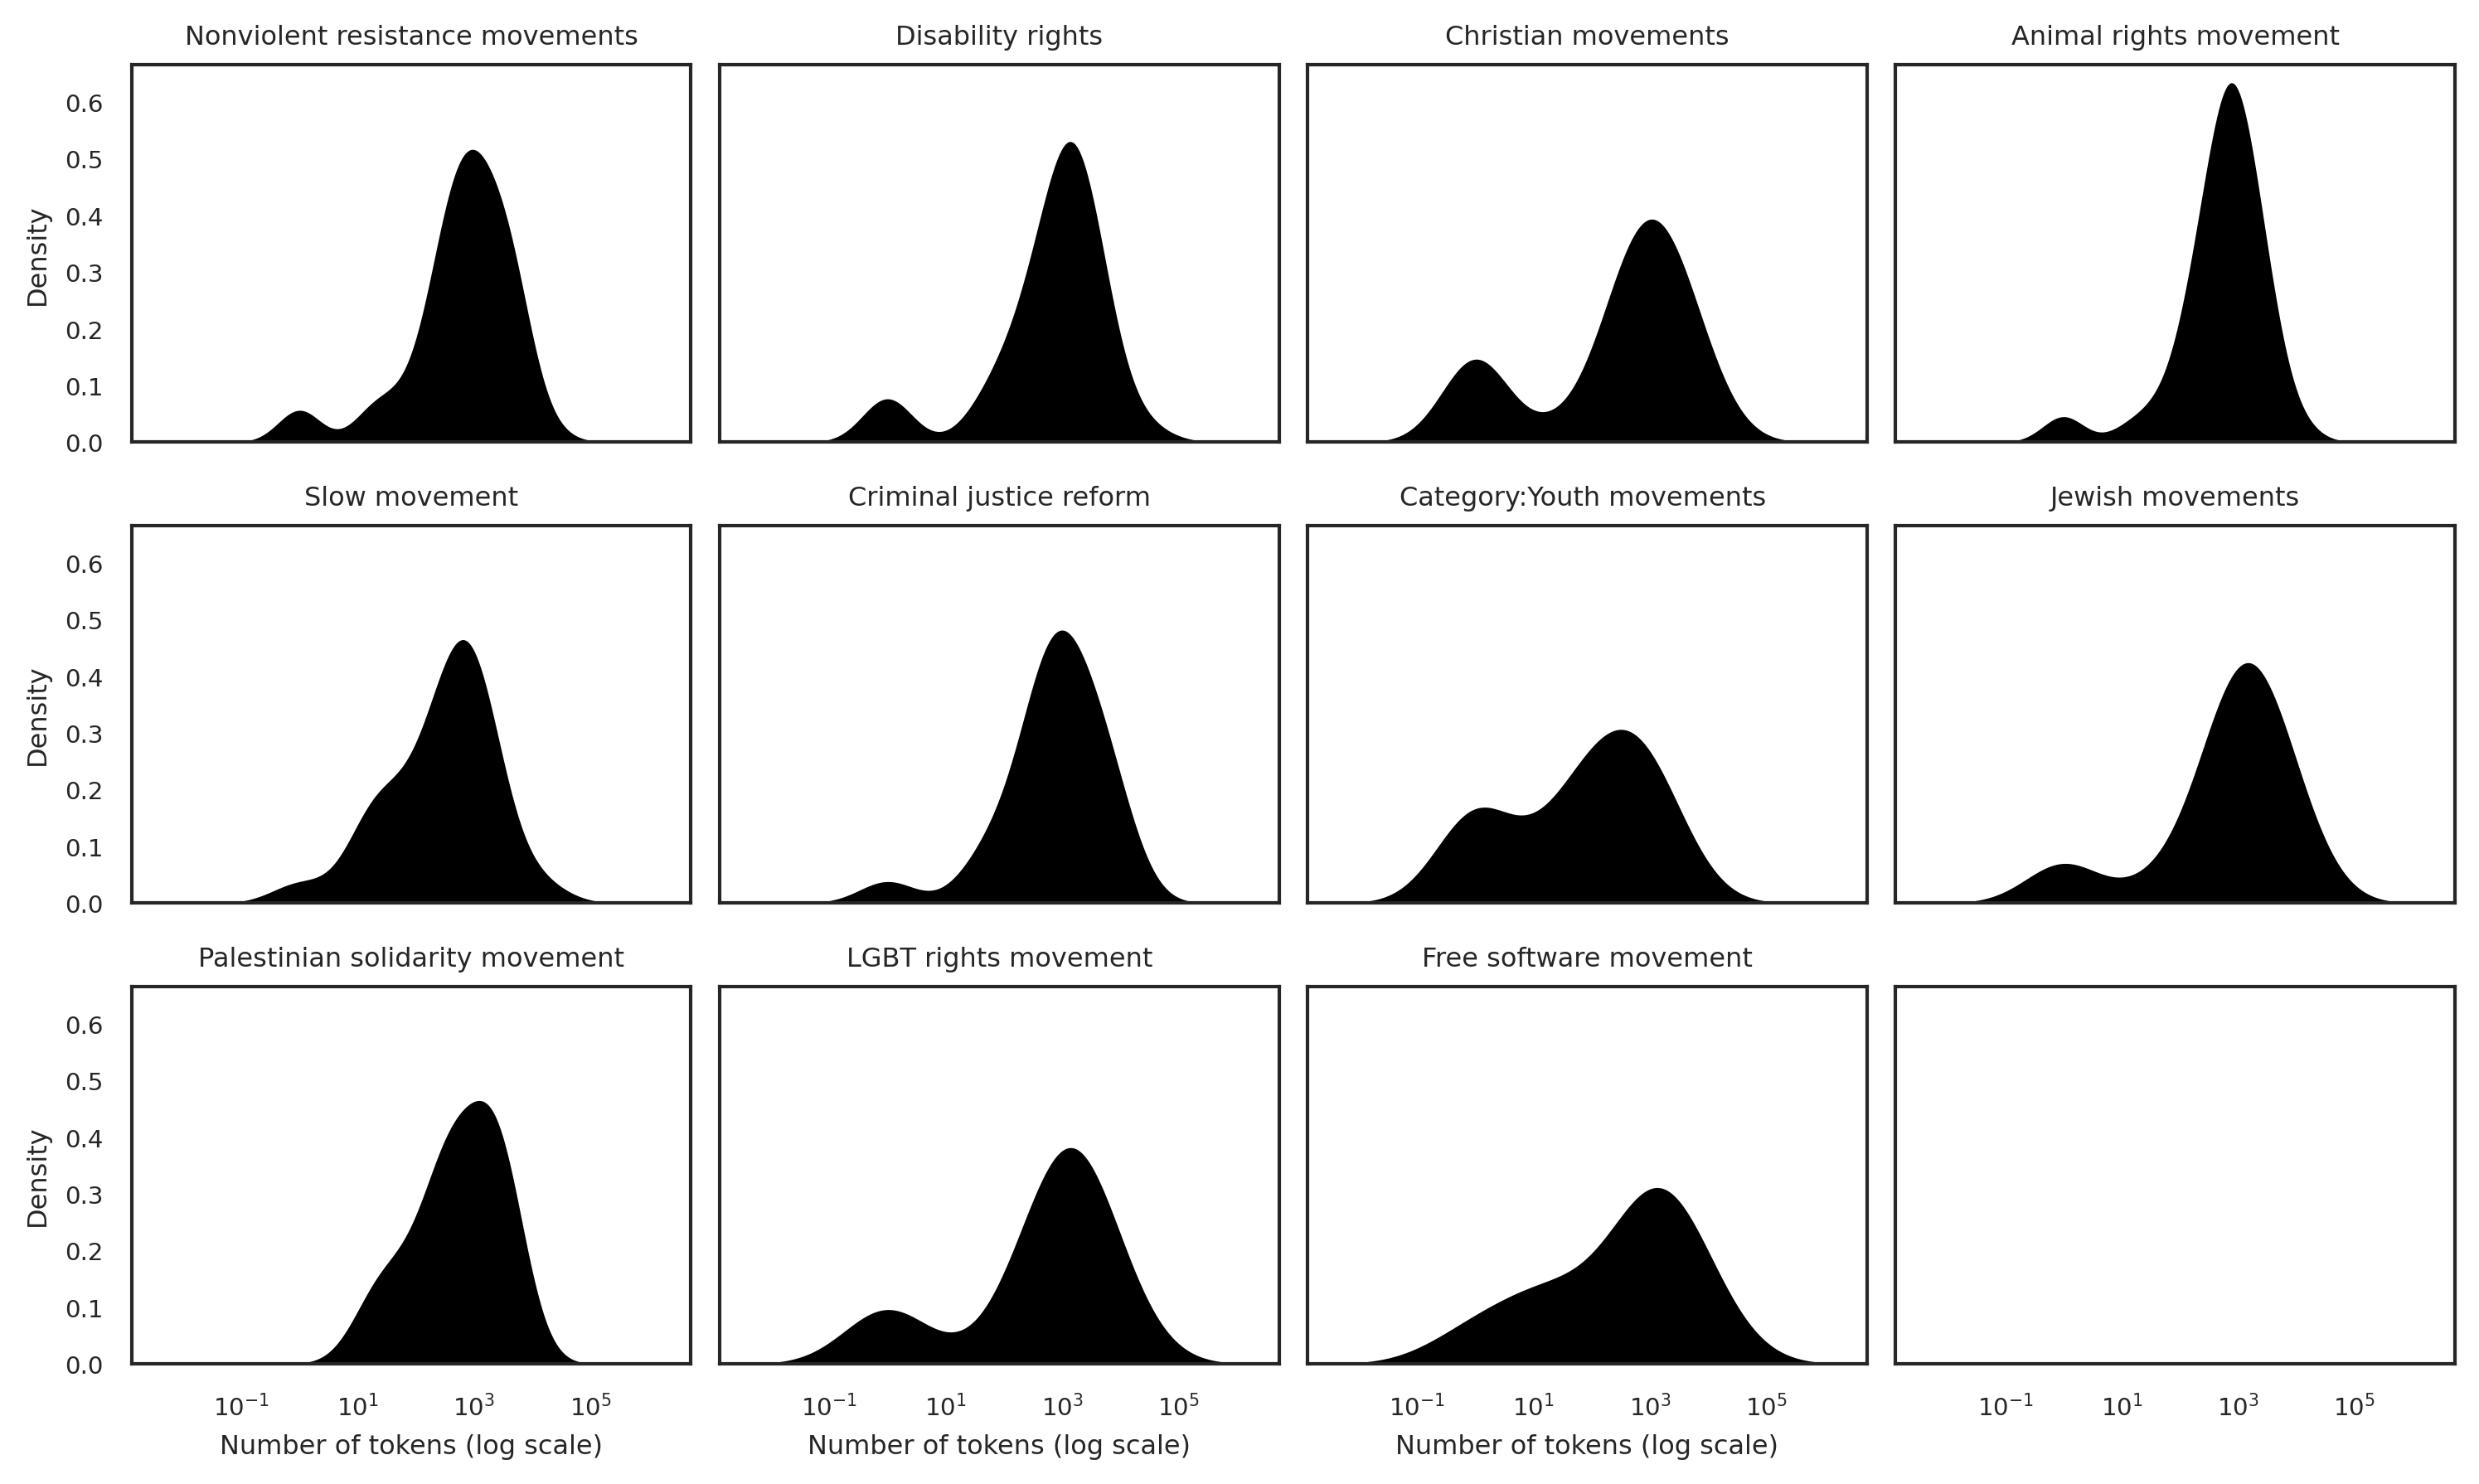

In [11]:
categories = sampled_contents.groupby('Category')
def categoria_subplot(subgroup, title, position):
    sns.kdeplot(ax = position, data=subgroup, x='content_len', log_scale=True, fill=True, alpha=1, linewidth=0, color='black')
    position.set(xlabel='Number of tokens (log scale)', title=title)
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10,6))

categoria_subplot(categories.get_group('Category:Nonviolent resistance movements (id: 1952176, ns: 14)'), 'Nonviolent resistance movements', ax[0,0])
categoria_subplot(categories.get_group('Category:Disability rights (id: 5119200, ns: 14)'), 'Disability rights', ax[0,1])
categoria_subplot(categories.get_group('Category:Christian movements (id: 16181273, ns: 14)'), 'Christian movements', ax[0,2])
categoria_subplot(categories.get_group('Category:Animal rights movement (id: 7492917, ns: 14)'), 'Animal rights movement', ax[0,3])
categoria_subplot(categories.get_group('Category:Slow movement (id: 5360355, ns: 14)'), 'Slow movement', ax[1,0])
categoria_subplot(categories.get_group('Category:Criminal justice reform (id: 46917429, ns: 14)'), 'Criminal justice reform', ax[1,1])
categoria_subplot(categories.get_group('Category:Youth movements (id: 18949344, ns: 14)'), 'Category:Youth movements ', ax[1,2])
categoria_subplot(categories.get_group('Category:Jewish movements (id: 11050806, ns: 14)'), 'Jewish movements', ax[1,3])
categoria_subplot(categories.get_group('Category:Palestinian solidarity movement (id: 64683662, ns: 14)'), 'Palestinian solidarity movement', ax[2,0])
categoria_subplot(categories.get_group('Category:LGBT rights movement (id: 6371525, ns: 14)'), 'LGBT rights movement', ax[2,1])
categoria_subplot(categories.get_group('Category:Free software movement (id: 48447672, ns: 14)'), 'Free software movement', ax[2,2])
plt.tight_layout()
plt.show()
fig.savefig("graficadensidadWiki")            

In [12]:
bigram_model, preprocessed = preprocess(sampled_contents['Content'], nlp=nlp, bigrams=True, detokenize=True, n_process=4)

In [13]:
len(preprocessed)

410

In [17]:
with open('processed_sample_contents.pkl', 'wb') as fp:
    pickle.dump(preprocess, fp)

with open('sample_contents_bigram_model.pkl', 'wb') as fp:
    pickle.dump(bigram_model, fp)

with open('processed_sample_contents.pkl', 'rb') as fp:
    preprocess = pickle.load(fp)

In [18]:
sampled_contents.iloc[90]['Content']

'[Section: Historical background (1):\nAs birth-control methods advanced during the late 19th and early 20th centuries, many conservative Christian movements issued official statements against their use, citing their incompatibility with biblical beliefs and ideals.\nIn addition, there are those who contend that Quiverfull\'s "internal growth" model is a manifestation of a broader trend which is reflected in the lifestyles of such groups as Orthodox Jews (particularly Haredi and Hasidic Jews) and certain Christians including Orthodox Calvinists of the Netherlands, traditional Anabaptists (such as Old Order Amish, Old Colony Mennonites, and certain Conservative Mennonites), some traditional Methodists of the conservative holiness movement, and Laestadian Lutherans of Finland. The former may also be a case of a manifestation of a movement of opinion within some ethnic, linguistic, religious, regional, or other identifiable groups whose members have expressed concern about their continued

In [19]:
sampled_contents['preprocessed'] = preprocess

In [20]:
sampled_contents.iloc[90]['preprocessed']

<function dcss.text.preprocess(texts, nlp=<spacy.lang.en.English object at 0x7445c11a8d60>, bigrams=False, detokenize=True, n_process=1, custom_stops=[])>

In [22]:
count_vectorizer = CountVectorizer(max_df=.1, min_df=3, strip_accents='ascii',)

In [24]:
count_matrix = count_vectorizer.fit_transform(preprocessed)
vocabulary = count_vectorizer.get_feature_names_out()
count_matrix.shape

(410, 5503)

In [28]:
with open('count_matrix.pkl', 'wb') as fp:
    pickle.dump(count_matrix, fp)

with open('vocabulary.pkl', 'wb') as fp:
    pickle.dump(vocabulary, fp)


In [30]:
count_data = pd.DataFrame.sparse.from_spmatrix(count_matrix)
count_data.columns = vocabulary
count_data.index = sampled_contents['Category']
count_data.shape

(410, 5503)

In [31]:
print('sparse szie: ' +str(count_data.memory_usage().sum()/1048576) + "MB")
print ('sparse density: '+str(count_data.sparse.density))

sparse szie: 0.6090240478515625MB
sparse density: 0.02346569277068384


In [35]:
count_data_d = count_data.sparse.to_dense()
print('dense size:' + str(count_data_d.memory_usage().sum()/1048576) + "MB")

dense size:17.216796875MB


In [36]:
category_counts = sparse_groupby(sampled_contents['Category'], count_matrix, vocabulary)
results = category_counts.div(category_counts.sum(axis=1), axis=0)
results_t = results.T
results_t.sample(20, random_state=1006)

                  Category:Animal rights movement (id: 7492917, ns: 14)  \
veteran                                                    0.000000       
park                                                       0.001582       
steve                                                      0.000297       
peru                                                       0.000099       
convergence                                                0.000099       
adaptive                                                   0.000000       
intermediary                                               0.000000       
arkansas                                                   0.000000       
dorm                                                       0.000000       
desirable                                                  0.000000       
decentralization                                           0.000099       
israel                                                     0.000198       
caste                    

In [37]:
n_top_words = 5
n_top_words_per_category = {}

for category in results_t.columns:
    top = results_t[category].nlargest(n_top_words)
    n_top_words_per_category[category] = list(zip(top.index, top))

for k, v in n_top_words_per_category.items():
    print(k.upper())
    for each in v:
        print(each)
    print('\n')

CATEGORY:ANIMAL RIGHTS MOVEMENT (ID: 7492917, NS: 14)
('alf', 0.020069204152249134)
('farm', 0.01384083044982699)
('elephant', 0.009391992090954029)
('fur', 0.008601087493821057)
('welfare', 0.008106772120612952)


CATEGORY:CHRISTIAN MOVEMENTS (ID: 16181273, NS: 14)
('methodist', 0.027540867093105898)
('catholic', 0.011608623548922056)
('protestant', 0.009654110400379057)
('evangelical', 0.009357972044539208)
('christianity', 0.00906183368869936)


CATEGORY:CRIMINAL JUSTICE REFORM (ID: 46917429, NS: 14)
('drug', 0.06376883796238635)
('substance', 0.015319466932370159)
('schedule', 0.014198530327562586)
('single_convention', 0.01195665711794744)
('treaty', 0.01170756009465687)


CATEGORY:DISABILITY RIGHTS (ID: 5119200, NS: 14)
('patient', 0.009476685675947668)
('mental_health', 0.007296209325729621)
('supreme_court', 0.005786648775578665)
('euthanasia', 0.004906071787990607)
('sterilization', 0.004486749412948675)


CATEGORY:FREE SOFTWARE MOVEMENT (ID: 48447672, NS: 14)
('free_software'

In [46]:
diff_con_snp = results_t['Category:Jewish movements (id: 11050806, ns: 14)'] - results_t['Category:Palestinian solidarity movement (id: 64683662, ns: 14)']
diff_con_snp.sort_values(ascending=False)
auth_not_snp = diff_con_snp.head(20)
env_not_snp = diff_con_snp.tail(20)


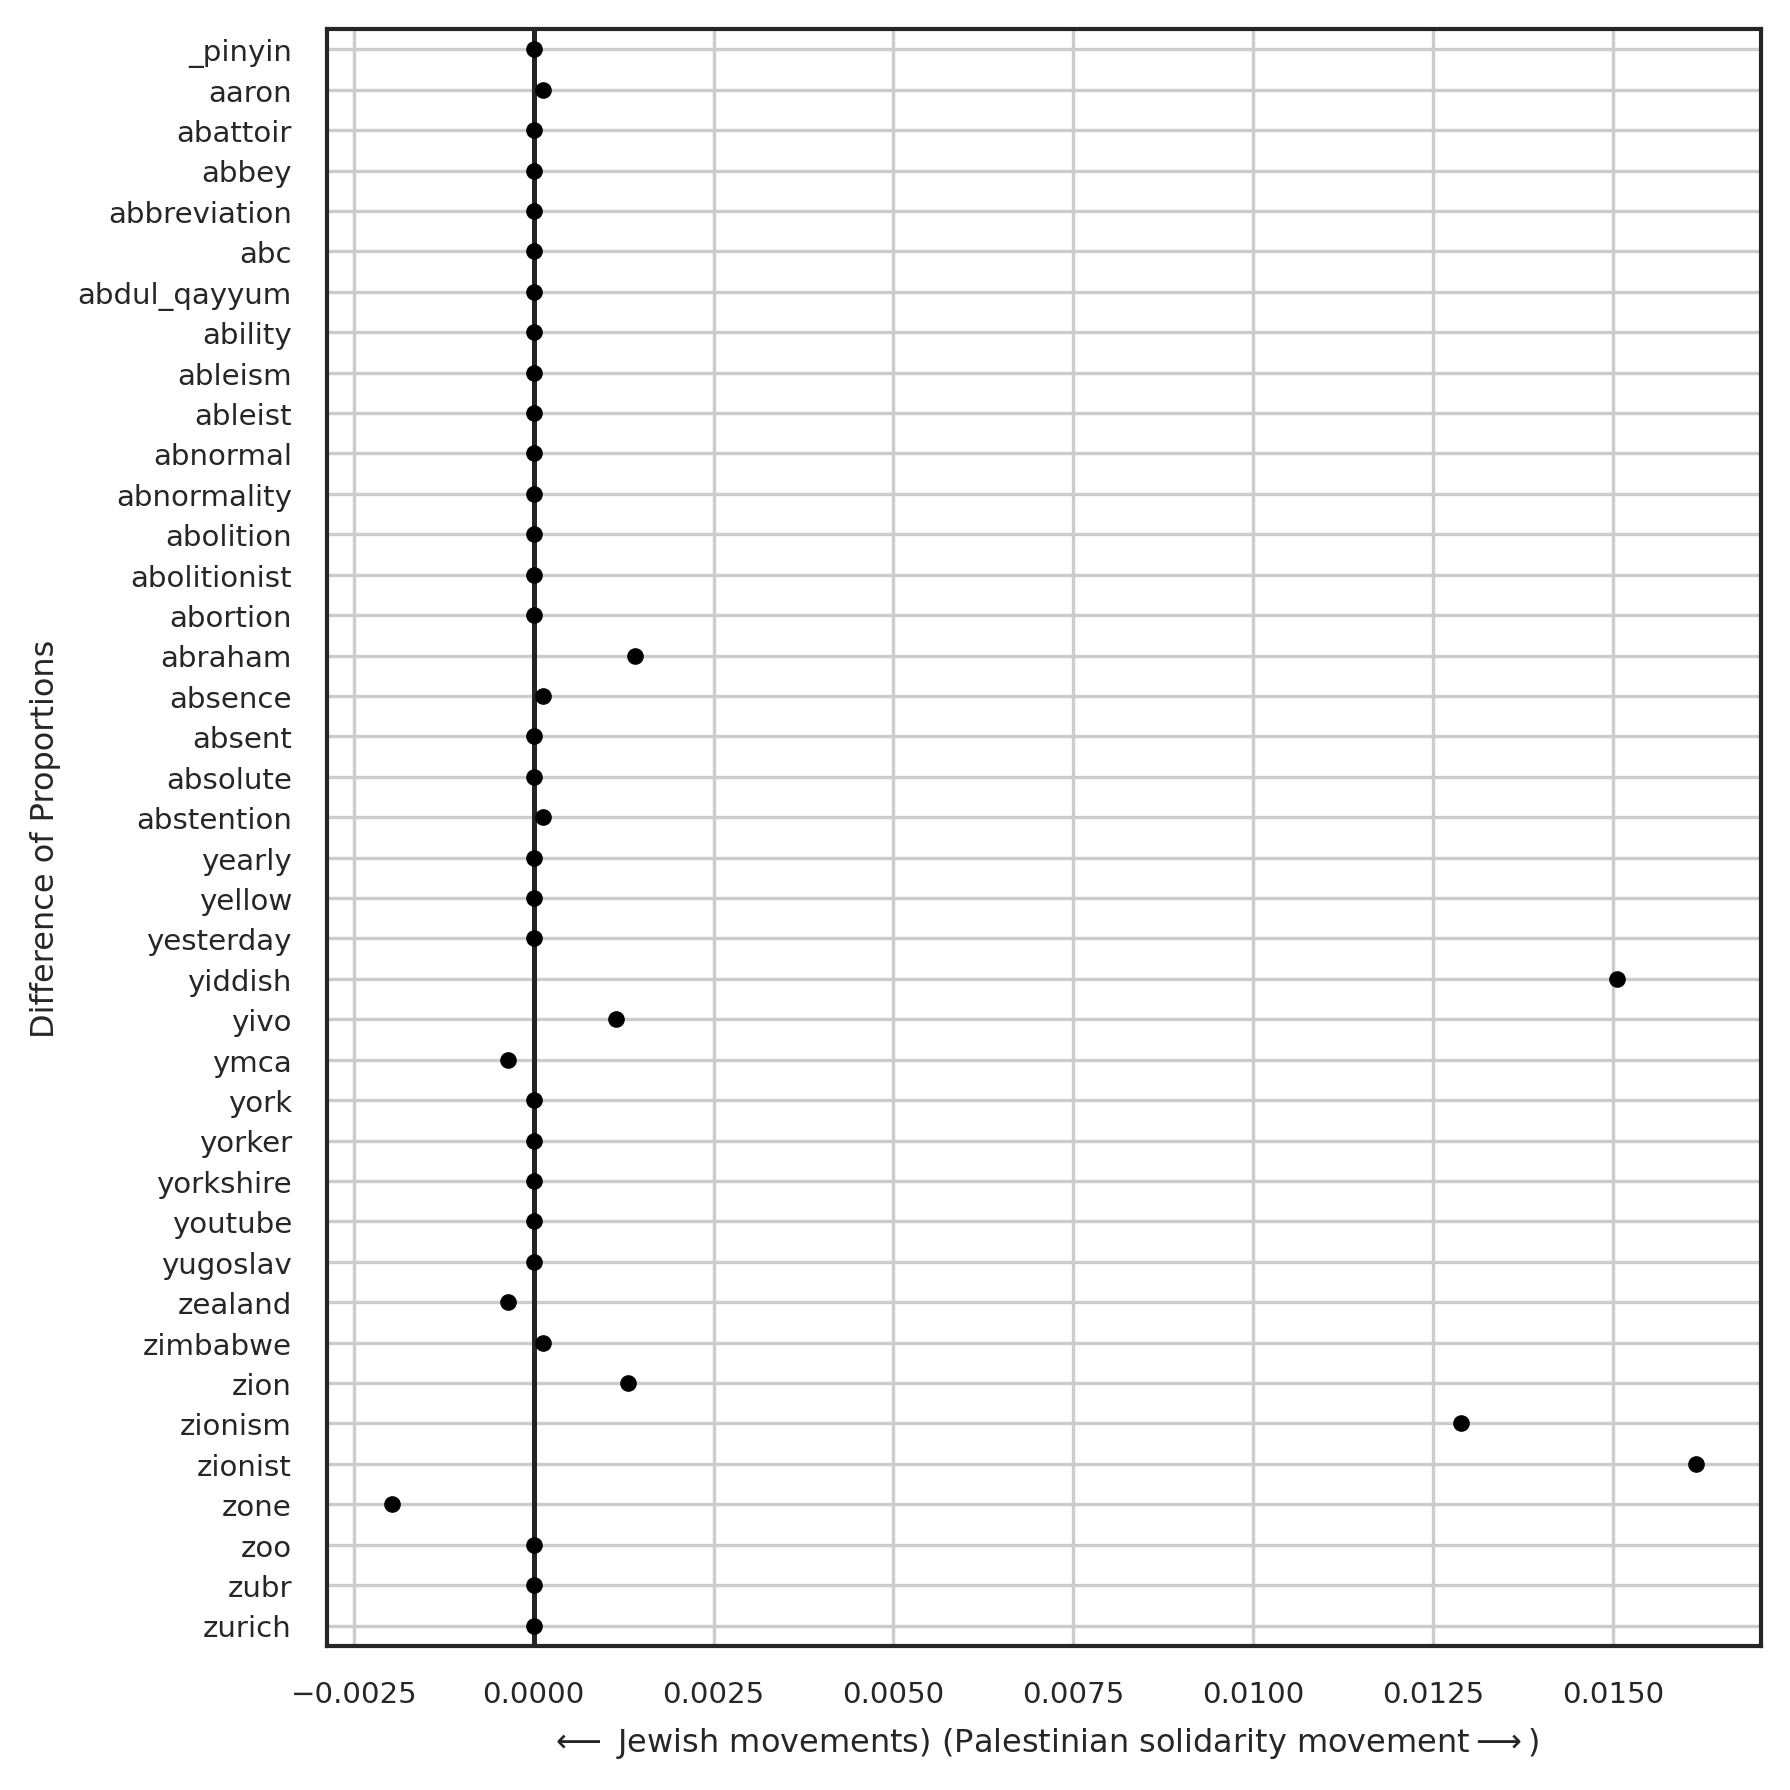

In [52]:
dop = pd.concat([auth_not_snp, env_not_snp])
fig, ax = plt.subplots(figsize= (6,6))
sns.swarmplot(x=dop, y=dop.index, color='black', size=4)
ax.axvline(0)
plt.grid()
ax.set(xlabel=r'$\longleftarrow$ Jewish movements) (Palestinian solidarity movement$\longrightarrow$)', ylabel='Difference of Proportions')
plt.tight_layout()